<a href="https://colab.research.google.com/github/Armina101/postpartum-depression-backup/blob/main/final_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Pre-processing**

## **Importing all needed libraries**

In [1]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **Read Dataset**

In [2]:
data_path = "THP_clean.csv"
fallback_url = "https://raw.githubusercontent.com/Armina101/Postpartum-depression-prediction-model/refs/heads/main/THP_clean.csv"
if os.path.exists(data_path):
    df = pd.read_csv(data_path, low_memory=False)
else:
    df = pd.read_csv(fallback_url, low_memory=False)


In [3]:
df.head()

,newid,interviewer,uc,grandmother,employed_mo,income_mo,income_hh,genhealth,edu_mo,edu_fa,...,infantdev_1y,infantdev_1y_f,parentinputs_infancy,parentinputs_infancy_f,infantdev,infantdev_f,motherfinancial_7y,motherfinancial_7y_f,socialsupport,socialsupport_f
0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,7.319728,...,-1.550027,-0.914190,0.845854,0.341055,-1.155602,-0.975243,NaN,NaN,1.496326,NaN
1,226.0,1.0,1,No,No,0.0,60.0,Very good,0.0,8.000000,...,0.919651,0.044339,2.737210,0.550107,0.587643,0.244921,-0.064279,-0.346433,2.569177,1.731267
2,222.0,6.0,1,Yes,No,0.0,200.0,Moderate,7.0,9.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.521870,-0.295887,1.275779,NaN
3,3.0,1.0,1,No,No,0.0,150.0,Good,0.0,5.000000,...,1.589225,0.971888,0.634669,0.429139,0.326545,0.626777,0.521984,-0.163072,-0.521288,-0.880748
4,217.0,3.0,1,No,No,0.0,250.0,0,5.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.521984,-0.163072,1.275779,NaN


In [4]:
df.tail()

,newid,interviewer,uc,grandmother,employed_mo,income_mo,income_hh,genhealth,edu_mo,edu_fa,...,infantdev_1y,infantdev_1y_f,parentinputs_infancy,parentinputs_infancy_f,infantdev,infantdev_f,motherfinancial_7y,motherfinancial_7y_f,socialsupport,socialsupport_f
1198,546.0,5.0,40,Yes,No,0.0,150.0,Very good,0.0,10.000000,...,-0.213161,-0.325892,0.746556,0.541312,0.176705,-0.694231,-0.064279,-0.346433,0.204220,-0.035893
1199,NaN,NaN,40,NaN,NaN,NaN,NaN,NaN,NaN,7.319728,...,-0.315063,-0.402695,0.425044,NaN,0.903029,0.132893,NaN,NaN,-0.025040,NaN
1200,594.0,5.0,40,Yes,No,0.0,80.0,Moderate,4.0,7.000000,...,1.145054,0.341715,0.746556,0.541312,1.455266,0.502727,0.521984,-0.163072,0.747689,0.313829
1201,568.0,5.0,40,No,Yes,NaN,NaN,Good,5.0,8.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.449251,NaN,-0.380235,NaN
1202,NaN,NaN,40,NaN,NaN,NaN,NaN,NaN,NaN,7.319728,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Sanity check of data**

In [5]:
print("Shape:", df.shape)
print("dtypes summary:")
print(df.dtypes.value_counts())

Shape: (1203, 394)
dtypes summary:
float64    366
object      17
int64       11
Name: count, dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203 entries, 0 to 1202
Columns: 394 entries, newid to socialsupport_f
dtypes: float64(366), int64(11), object(17)
memory usage: 3.6+ MB


In [7]:
obj_cols = df.select_dtypes(include='object').columns.tolist()
for col in obj_cols[:20]:
    print(f"--- {col} (nunique={df[col].nunique()}) ---")
    print(df[col].value_counts(dropna=False).head(10))

--- grandmother (nunique=2) ---
grandmother
No     538
Yes    347
NaN    318
Name: count, dtype: int64
--- employed_mo (nunique=2) ---
employed_mo
No     781
NaN    318
Yes    104
Name: count, dtype: int64
--- genhealth (nunique=5) ---
genhealth
Good         364
NaN          318
Moderate     251
Very good    184
0             70
Bad           16
Name: count, dtype: int64
--- ideal_no_kids (nunique=10) ---
ideal_no_kids
NaN    319
4      267
3      262
2      237
5       58
6       18
.d      11
7       10
1        9
8        8
Name: count, dtype: int64
--- mo_185 (nunique=2) ---
mo_185
Yes    558
NaN    344
No     301
Name: count, dtype: int64
--- mo_358 (nunique=5) ---
mo_358
not played at all    602
NaN                  318
.25                  105
once or twice        102
.5                    56
.75                   20
Name: count, dtype: int64
--- mo_360 (nunique=2) ---
mo_360
Yes    517
No     368
NaN    318
Name: count, dtype: int64
--- ch_27 (nunique=2) ---
ch_27
Yes    704
Na

In [8]:
# Check and drop duplicate rows
num_dupes = df.duplicated().sum()
print("Number of duplicate rows:", num_dupes)

if num_dupes > 0:
    df = df.drop_duplicates().reset_index(drop=True)
    print("Duplicates dropped. New shape:", df.shape)

Number of duplicate rows: 0


In [9]:
# Check for garbage/unexpected values in categorical (object or category) columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(dropna=False))  # also counts NaN if present
    print("-" * 40)


Column: grandmother
grandmother
No     538
Yes    347
NaN    318
Name: count, dtype: int64
----------------------------------------

Column: employed_mo
employed_mo
No     781
NaN    318
Yes    104
Name: count, dtype: int64
----------------------------------------

Column: genhealth
genhealth
Good         364
NaN          318
Moderate     251
Very good    184
0             70
Bad           16
Name: count, dtype: int64
----------------------------------------

Column: ideal_no_kids
ideal_no_kids
NaN    319
4      267
3      262
2      237
5       58
6       18
.d      11
7       10
1        9
8        8
0        4
Name: count, dtype: int64
----------------------------------------

Column: mo_185
mo_185
Yes    558
NaN    344
No     301
Name: count, dtype: int64
----------------------------------------

Column: mo_358
mo_358
not played at all    602
NaN                  318
.25                  105
once or twice        102
.5                    56
.75                   20
Name: count, dt

## **Exploratory Data Analysis**

In [10]:
# Descriptive statistics for numeric columns
print("Numeric features summary:")
display(df.describe())

# Descriptive statistics for categorical columns
print("\nCategorical features summary:")
display(df.describe(include=['object', 'category']))

Numeric features summary:


,newid,interviewer,uc,income_mo,income_hh,edu_mo,edu_fa,no_kids_over5_dead,no_kids_1_5_dead,no_kids_less1_dead,...,infantdev_1y,infantdev_1y_f,parentinputs_infancy,parentinputs_infancy_f,infantdev,infantdev_f,motherfinancial_7y,motherfinancial_7y_f,socialsupport,socialsupport_f
count,885.000000,885.000000,1203.000000,876.000000,756.000000,885.000000,1203.000000,882.000000,881.000000,881.000000,...,712.000000,7.080000e+02,816.000000,5.860000e+02,740.000000,7.030000e+02,885.000000,8.500000e+02,1120.000000,5.840000e+02
mean,446.225989,4.672316,20.358271,4.332192,141.707143,4.532203,7.319728,0.020408,0.037457,0.254257,...,0.202339,7.455650e-10,0.185357,-3.583618e-09,0.133936,1.593172e-10,0.177863,4.270588e-09,0.346108,1.469041e-09
std,256.597500,2.254451,11.440891,15.539970,116.350589,4.182804,3.226069,0.141472,0.217851,0.622537,...,0.986870,8.181502e-01,1.191635,9.470208e-01,1.007829,9.371984e-01,1.047386,8.890144e-01,1.083957,7.565686e-01
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-4.269506,-4.648146e+00,-4.007296,-2.417459e+00,-3.322134,-4.993645e+00,-1.108133,-4.792471e-01,-2.809055,-2.106218e+00
25%,225.000000,3.000000,10.000000,0.000000,70.000000,0.000000,7.000000,0.000000,0.000000,0.000000,...,-0.481443,-4.741491e-01,-0.516389,2.669969e-01,-0.541004,-5.238761e-01,-1.108133,-4.792471e-01,-0.380235,-5.160580e-01
50%,447.000000,5.000000,20.000000,0.000000,100.000000,5.000000,7.319728,0.000000,0.000000,0.000000,...,0.281445,2.411396e-02,0.260971,4.462136e-01,0.206483,2.035729e-02,0.521984,-1.630720e-01,0.385548,1.932745e-02
75%,668.000000,6.000000,30.000000,0.000000,180.000000,8.000000,10.000000,0.000000,0.000000,0.000000,...,0.969147,5.129925e-01,0.746556,5.413125e-01,0.876496,6.015202e-01,0.521984,-1.630720e-01,1.095594,5.129678e-01
max,889.000000,9.000000,40.000000,100.000000,800.000000,18.000000,16.000000,1.000000,3.000000,6.000000,...,2.511270,2.217049e+00,3.995981,7.250453e-01,2.439257,2.655170e+00,4.615942,4.415358e+00,2.739945,1.797304e+00



Categorical features summary:


,grandmother,employed_mo,genhealth,ideal_no_kids,mo_185,mo_358,mo_360,ch_27,ch_28,ch_29,ch_30,ch_31,ch_32,ch_33,ch_34,ch_35,ch_36
count,885,885,885,884,859,885,885,874,874,874,874,874,874,874,874,874,850
unique,2,2,5,10,2,5,2,2,2,2,2,2,2,2,2,2,2
top,No,No,Good,4,Yes,not played at all,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,No,Yes
freq,538,781,364,267,558,602,517,704,744,476,507,793,814,857,581,598,431


In [11]:
# Define target column safely
input_target_class = "hamd_6m"

if input_target_class in df.columns:
    y = df[input_target_class]
else:
    raise ValueError(f"Target column '{input_target_class}' not found in dataset.")

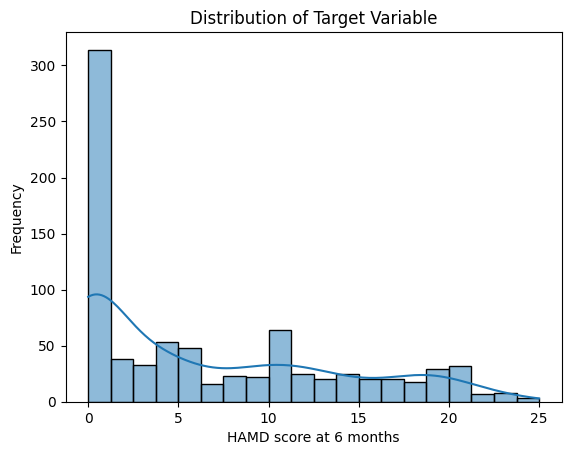

In [12]:
input_target_class = "hamd_6m"

if input_target_class in df.columns:
    sns.histplot(df[input_target_class], bins=20, kde=True)
    plt.xlabel("HAMD score at 6 months")
    plt.ylabel("Frequency")
    plt.title("Distribution of Target Variable")
    plt.show()
else:
    print(f"Target column '{input_target_class}' not found in dataset.")

The histogram shows the distribution of the target variable "hamd_6m". Most values are clustered at the lower end of the scale but there are also a few high scores which translates to severe postpartum depression.

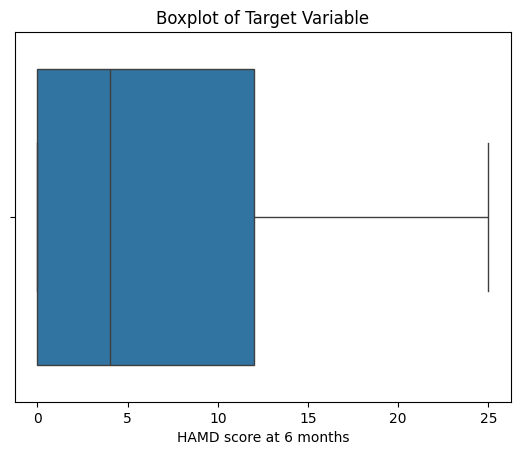

In [13]:
if input_target_class in df.columns:
    sns.boxplot(x=df[input_target_class].dropna())  # drop NaN if present
    plt.xlabel("HAMD score at 6 months")
    plt.title("Boxplot of Target Variable")
    plt.show()
else:
    print(f"Target column '{input_target_class}' not found in dataset.")

The boxplot shows concentration of scores around the lower range and also some outliers which translates to more severe cases of postpartum depression. This shows that the dataset is somewhat skewed towrads lower scores.

In [14]:
if input_target_class in df.columns:
    print(df[input_target_class].value_counts().sort_index())
else:
    print(f"Target column '{input_target_class}' not found in dataset")

hamd_6m
0.0     282
1.0      32
2.0      38
3.0      33
4.0      53
5.0      26
6.0      22
7.0      16
8.0      23
9.0      22
10.0     34
11.0     30
12.0     25
13.0     20
14.0     25
15.0      8
16.0     12
17.0     20
18.0     18
19.0     29
20.0     20
21.0     12
22.0      7
23.0      8
24.0      2
25.0      1
Name: count, dtype: int64


Lets check the percentage of missing values in the target class "hamd_6m" and then we'll proceed to drop them before transformation or training the model.

In [15]:
if "hamd_6m" in df.columns:
    # checking percentage of missing values
    missing_pct = df["hamd_6m"].isnull().mean() * 100
    print(f"Missing target percentage: {missing_pct:.2f}%")

    # checking missing count
    print("Missing target values:", df["hamd_6m"].isnull().sum())

    # dropping rows where target is missing
    df = df.dropna(subset=["hamd_6m"])
    print("New shape after dropping missing targets:", df.shape)
else:
    print("Target column not found in dataset — skipping missing target check")

Missing target percentage: 32.00%
Missing target values: 385
New shape after dropping missing targets: (818, 394)


Target class completed, moving on to x (independent variables)

## **Fixing Garbage Values**

In [16]:
#checking for garbage values
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()
    df[col] = df[col].replace({"na": np.nan, "n/a": np.nan, "?": np.nan})

In [17]:
# Define garbage values you want to treat as missing
garbage_values = ["0", "??", "na", "NA", "NaN", "missing", "N/A", "none", "None"]

# Loop through all object columns and clean them
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].replace(garbage_values, np.nan)

# Also try converting numeric-like object columns into numbers
for col in df.select_dtypes(include='object').columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

/tmp/ipython-input-174276470.py:10: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


In [18]:
# Define known garbage replacements or mappings
global_mappings = {
    "0": np.nan,
    "not played at all": 0.0,
    "once or twice": 0.25,
    "yes": 1,
    "no": 0,
    "bad": 1,
    "moderate": 2,
    "good": 3,
    "very good": 4
}

# Apply mappings to all object columns
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].replace(global_mappings)
    # Try to convert to numeric, but keep text if it fails
    df[col] = pd.to_numeric(df[col], errors="ignore")

# Convert all columns to numeric where possible
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")  # converts numeric-like strings, sets non-convertible to NaN

/tmp/ipython-input-1630947816.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(global_mappings)
/tmp/ipython-input-1630947816.py:18: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


Now let's recheck to be sure we treated those garbage values

In [19]:
# verify that no unexpected values remain
for col in df.select_dtypes(include="object").columns:
    unique_values = set(df[col].dropna().unique())
    unmapped_values = unique_values - set(global_mappings.keys())

    if unmapped_values:
        print(f"Column '{col}' has values not in mapping: {unmapped_values}")
    else:
        print(f"Column '{col}' cleaned successfully")

## **Missing Values Treatment**

In [20]:
# Check for missing values
print("Missing values per column:\n")
print(df.isnull().sum())

Missing values per column:

newid                   234
interviewer             234
uc                        0
grandmother             234
employed_mo             234
                       ... 
infantdev_f             115
motherfinancial_7y      234
motherfinancial_7y_f    257
socialsupport             0
socialsupport_f         234
Length: 394, dtype: int64


In [21]:
# Checking for columns with high missingness (%)
pd.set_option('display.max_rows', None)
missing_percent = df.isnull().sum() / df.shape[0] * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
print("\nColumns with missing values (%):")
print(missing_percent)


Columns with missing values (%):
relation_traj_f           55.623472
relationshipindex_f       55.501222
relationship_inlaw        54.767726
age_kid1                  54.156479
days_healthy              47.555012
motherhealthindex_f       47.555012
fatherfinancial_f         45.110024
expend_food               43.765281
ln_income_fa              42.053790
expend_educ               39.853301
ln_expend_educ            39.853301
expend_med                39.731051
incomeindex_f             39.242054
income_hh                 38.753056
genhealth                 35.085575
motherfinancial_f         31.540342
schoolqual_pca            31.418093
motherfinancial_7y_f      31.418093
ch_36                     31.418093
mo_185                    30.684597
relationship_husb         30.684597
nonviolent                30.684597
maritalscale              30.684597
cognindex_f               30.562347
ideal_no_kids             30.317848
relationshipindex         29.951100
fertility_vars_f          29.9

Let's drop columns with missingness greater than 40% to reduce noise and avoid bias

In [22]:
# columns to drop (greater than 40% missing)
cols_to_drop = missing_percent[missing_percent > 40].index

print(f"Number of columns to drop: {len(cols_to_drop)}")
print("Columns:", cols_to_drop.tolist())

# dropping them
df = df.drop(columns=cols_to_drop, errors='ignore')

print("New shape:", df.shape)

Number of columns to drop: 9
Columns: ['relation_traj_f', 'relationshipindex_f', 'relationship_inlaw', 'age_kid1', 'days_healthy', 'motherhealthindex_f', 'fatherfinancial_f', 'expend_food', 'ln_income_fa']
New shape: (818, 385)


Now that I've dropped the columns with greater than 40% missingness, I'll treat the other missing values; numerical columns will be filled with median while categorical columns will be filled with mode to avoid losing too much data.

In [23]:
# Separate column types
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Impute numeric columns with median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Impute categorical columns with mode, safely
for col in cat_cols:
    if not df[col].mode().empty:
        df[col] = df[col].fillna(df[col].mode().iloc[0])
    else:
        # If the column has all NaNs, fill with a placeholder
        df[col] = df[col].fillna("Unknown")

Let's check for missing values again to confirm if the imputation worked

In [24]:
total_missing = df.isnull().sum().sum()
if total_missing == 0:
    print("No missing values remain")
else:
    print(f"There are still {total_missing} missing values")

No missing values remain


It did!
Now moving on...

## **Outlier Treatment**

Outliers can cause biased model training and affect accuracy. Let's check how many outliers exist in the numerical columns.

In [25]:
# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate IQR for each numeric column
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers in each column
outliers = ((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).sum()

if outliers.sum() == 0:
    print("No outliers detected in numeric columns")
else:
    print("Number of outliers per column:\n", outliers[outliers > 0])

Number of outliers per column:
 employed_mo                    66
income_mo                      59
income_hh                     173
genhealth                     295
edu_mo                          6
edu_fa                        118
ideal_no_kids                  27
no_kids_over5_dead             14
no_kids_1_5_dead               22
no_kids_less1_dead            117
mo_358                        175
c_wt                          107
c_ht                           71
ch_27                         117
ch_28                          85
ch_31                          57
ch_32                          43
ch_33                          12
ch_34                         182
ch_35                         169
mo_ht                           2
mo_bmi                         21
kids_no                        16
bdq_6m                          6
ses_6m                          5
c_wt_6m                        24
c_ht_6m                        20
ses_1y                          3
pregnant_12m    

In [26]:
# Separate numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Split into continuous vs discrete numeric columns
cont_cols = [col for col in num_cols if df[col].nunique() > 10]
disc_cols = [col for col in num_cols if df[col].nunique() <= 10]

print("Continuous columns (outlier candidates):", cont_cols[:10] if cont_cols else "None")
print("Discrete numeric columns (ignored for outliers):", disc_cols[:10] if disc_cols else "None")

Continuous columns (outlier candidates): ['newid', 'uc', 'income_mo', 'income_hh', 'edu_mo', 'edu_fa', 'c_wt', 'c_ht', 'mo_ht', 'mo_bmi']
Discrete numeric columns (ignored for outliers): ['interviewer', 'grandmother', 'employed_mo', 'genhealth', 'ideal_no_kids', 'no_kids_over5_dead', 'no_kids_1_5_dead', 'no_kids_less1_dead', 'mo_185', 'mo_358']


To handle outliers, I will apply capping to replace extreme values with the upper and lower percentile thresholds.

In [27]:
# Function to cap outliers at 1st and 99th percentile
def cap_outliers(series, lower_q=0.01, upper_q=0.99):
    lower = series.quantile(lower_q)
    upper = series.quantile(upper_q)
    capped = np.where(series < lower, lower,
                      np.where(series > upper, upper, series))
    return capped, lower, upper

# Apply capping to all continuous numeric columns
capped_info = {}  # to store capping thresholds for reference

if not cont_cols:
    print("No continuous numeric columns to cap.")
else:
    for col in cont_cols:
        original_min, original_max = df[col].min(), df[col].max()
        df[col], lower, upper = cap_outliers(df[col])
        capped_info[col] = (lower, upper, original_min, original_max)
        print(f"{col}: capped below {lower:.2f}, above {upper:.2f} (original min={original_min}, max={original_max})")

newid: capped below 12.17, above 872.49 (original min=1.0, max=888.0)
uc: capped below 1.00, above 40.00 (original min=1, max=40)
income_mo: capped below 0.00, above 60.00 (original min=0.0, max=100.0)
income_hh: capped below 0.02, above 541.50 (original min=0.0, max=800.0)
edu_mo: capped below 0.00, above 12.00 (original min=0.0, max=18.0)
edu_fa: capped below 0.00, above 13.66 (original min=0.0, max=16.0)
c_wt: capped below 14.30, above 29.71 (original min=8.5, max=37.099998)
c_ht: capped below 106.68, above 134.62 (original min=86.360001, max=160.02)
mo_ht: capped below 1.44, above 1.70 (original min=1.38, max=1.74)
mo_bmi: capped below 16.92, above 36.95 (original min=15.39999961853027, max=46.90000152587891)
hamd_baseline: capped below 7.00, above 22.00 (original min=5.0, max=23.0)
bdq_baseline: capped below 2.00, above 13.00 (original min=0.0, max=14.0)
edu_mo_baseline: capped below 0.00, above 12.00 (original min=0.0, max=16.0)
edu_fa_baseline: capped below 0.00, above 14.00 (or

Let's check how the values in each column were adjusted.

In [28]:
# Show summary of capped columns
print("Outlier capping summary:")
for col, (lower, upper, orig_min, orig_max) in list(capped_info.items())[:10]:  #first 10
    print(f"{col}: capped from [{orig_min}, {orig_max}] → [{lower}, {upper}]")

Outlier capping summary:
newid: capped from [1.0, 888.0] → [12.17, 872.4900000000001]
uc: capped from [1, 40] → [1.0, 40.0]
income_mo: capped from [0.0, 100.0] → [0.0, 60.0]
income_hh: capped from [0.0, 800.0] → [0.02, 541.500000000002]
edu_mo: capped from [0.0, 18.0] → [0.0, 12.0]
edu_fa: capped from [0.0, 16.0] → [0.0, 13.660000000000082]
c_wt: capped from [8.5, 37.099998] → [14.302, 29.712999830000044]
c_ht: capped from [86.360001, 160.02] → [106.68, 134.62]
mo_ht: capped from [1.38, 1.74] → [1.44, 1.6983000000000004]
mo_bmi: capped from [15.39999961853027, 46.90000152587891] → [16.916999683380123, 36.94900012969972]


## **Skewness Correction**

Let's check skewness

Let's define the skewed columns (excluding categorical columns) so we can transform them.

In [29]:
from scipy.stats import skew

# Re-detect continuous numeric columns
cont_cols = [col for col in df.select_dtypes(include=['float64', 'int64']).columns
             if df[col].nunique() > 10]  # crude filter

if not cont_cols:
    print("No continuous numeric columns for skewness check.")
else:
    # Calculate skewness
    skewness = df[cont_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

    # Identify highly skewed
    highly_skewed = skewness[skewness > 1].index
    neg_skewed = skewness[skewness < -1].index

    print(f"Highly positively skewed columns (>1): {list(highly_skewed)}")
    print(f"Highly negatively skewed columns (<-1): {list(neg_skewed)}")

Highly positively skewed columns (>1): ['income_mo', 'childmort_f', 'motherfinancial_f', 'motherfinancial_7y_f', 'expend_med', 'income_hh', 'expend_educ', 'panic', 'depindex_7y', 'social_phobia', 'emoindex_f', 'gad', 'doi0Xtreat', 'age_sq', 'var416', 'class_size', 'mo_wt_6m', 'spence', 'depindex_7y_f']
Highly negatively skewed columns (<-1): ['mother_mh_f', 'p_hat', 'edu_fa_baselineXtreat', 'ln_expend_educ', 'healthindex', 'relationshipindex', 'fatherfinancial', 'math', 'ln_income_fa_1y', 'healthindex_f', 'motor', 'relationshipindex_1y_f', 'ln_income_fa_6m', 'childmort', 'parentinputs_infancy_f', 'mother_mh', 'stroop']


Now, I'll fix the highly skewed columns

In [30]:
from sklearn.preprocessing import PowerTransformer

# calculate skewness
cont_cols = [col for col in df.select_dtypes(include=['float64', 'int64']).columns
             if df[col].nunique() > 10]   # continuous numeric

skewness = df[cont_cols].apply(lambda x: x.skew()).sort_values(ascending=False)

# positive skew > 1
highly_skewed = skewness[skewness > 1].index

# negative skew < -1
neg_skewed = skewness[skewness < -1].index

# remove income_mo if you already handled it
if 'income_mo' in df.columns:
    highly_skewed = highly_skewed.drop('income_mo', errors='ignore')

# Apply Yeo-Johnson transformation if there are columns to transform
if len(highly_skewed) > 0:
    pt = PowerTransformer(method='yeo-johnson')
    df[highly_skewed] = pt.fit_transform(df[highly_skewed])

if len(neg_skewed) > 0:
    pt = PowerTransformer(method='yeo-johnson')
    df[neg_skewed] = pt.fit_transform(df[neg_skewed])

print("Skewness transformation complete.")

Skewness transformation complete.


In [31]:
if 'income_mo' in df.columns:
    # make backup
    df['income_mo_original'] = df['income_mo'].copy()

    income = df['income_mo_original'].copy()

    # cap at 90th percentile
    cap = income.quantile(0.90)
    income = income.clip(upper=cap)

    # log transform safely
    income = np.log1p(income)

    # replace
    df['income_mo'] = income

    print("Skew after fixing income_mo:", df['income_mo'].skew())
else:
    print("Column 'income_mo' not found. Skipping special handling.")

Skew after fixing income_mo: 0.0


/tmp/ipython-input-354097665.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['income_mo_original'] = df['income_mo'].copy()


Now the skewness has been fixed.

## **Encoding**

Since linear regression can only work with numeric inputs, I'll encode and convert all categorical variables to numbers

In [32]:
# Select categorical columns automatically
cat_cols = df.select_dtypes(include=['object', 'category']).columns

print("Categorical columns detected:", cat_cols.tolist())

if len(cat_cols) > 0:
    # Apply one-hot encoding only if categorical columns exist
    df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
    print("Shape before encoding:", df.shape)
    df = df_encoded.copy()
    print("Shape after encoding:", df.shape)
else:
    print("No categorical columns to encode. Skipping encoding step.")

Categorical columns detected: []
No categorical columns to encode. Skipping encoding step.


Let's drop some obvious identifiers

In [33]:
#define identifier columns
identifiers = ['newid', 'interviewer']

#Drop only if they exist in df
dropped_cols = [col for col in identifiers if col in df.columns]
df.drop(columns=dropped_cols, inplace=True)
print(f"Dropped identifier columns: {dropped_cols}")
print("New shape:", df.shape)

Dropped identifier columns: ['newid', 'interviewer']
New shape: (818, 384)


## **Feature Selection**

Let's check for multicollinearity using the correlation matrix

In [34]:
# Ensure target exists
if 'y' not in locals():
    raise ValueError("Target variable 'y' is not defined. Make sure to define it first.")

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute absolute correlation matrix
corr_matrix = df[numeric_cols].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Initialize list to hold columns to drop
to_drop = []

# Threshold for high correlation
threshold = 0.8

# Loop through columns
for col in upper.columns:
    # Find all columns correlated with this one above the threshold
    high_corr_cols = upper.index[upper[col] > threshold].tolist()
    for hc in high_corr_cols:
        # Compare correlation with target safely
        corr_col = df[col].corr(y)
        corr_hc = df[hc].corr(y)
        if np.isnan(corr_col):  # handle constant columns
            corr_col = 0
        if np.isnan(corr_hc):
            corr_hc = 0

        if corr_col < corr_hc:
            to_drop.append(col)
        else:
            to_drop.append(hc)

# Remove duplicates and drop
to_drop = list(set(to_drop))
df = df.drop(to_drop, axis=1)

print("Dropped columns due to high correlation:", to_drop)
print(f"Number of columns dropped: {len(to_drop)}")
print("New shape:", df.shape)

Dropped columns due to high correlation: ['notdep2013', 'home_obs', 'socialsupport', 'PPI', 'gender_4sum', 'mother_mh_f', 'dur_notdep', 'bdq_6m', 'var619', 'notdepressed', 'HAZ_6', 'healthindex_f', 'Group', 'fatherfinancial', 'c_ht', 'edu_mo', 'separation', 'motherfinancial_7y', 'mother_mh', 'edu_mo_baseline', 'var416', 'HAZ_12', 'gaf_6m_2', 'impaired', 'relationshipindex_1y_f', 'age', 'ch_29', 'scid_tot', 'hamd_1y', 'relationshipindex_1y', 'depindex_6m', 'WAZ_6', 'metalroof', 'edu_parents', 'WAZ_12', 'attrit', 'grandmothers', 'depressed_1y', 'cognindex_f', 'month_int_sq', 'grandmother_baselineXtreat', 'schoolqual_pca', 'parentstyle_f', 'grandmother_1y', 'vci', 'depindex_0', 'infantdev', 'depindex_1y', 'age_baseline_sq', 'notdep', 'depindex_6m_f', 'infantdev_f', 'MIL', 'scid_tot_2', 'infantdev_6m_f', 'expend_educ', 'spence', 'gad', 'notdep2012', 'ln_income_fa_6m', 'notdep1213', 'impaired_2', 'depindex_7y', 'three_groups', 'grandmaXtreat', 'wealth_baseline', 'hamd_baseline', 'edu_mo_bas

I'll encode the objects now before proceeding

In [35]:
# Re-encode only the remaining object columns
obj_cols = df.select_dtypes(include=['object']).columns

if len(obj_cols) > 0:
    df = pd.get_dummies(df, columns=obj_cols, drop_first=True)  # overwrite df
    print(f"Re-encoded columns: {obj_cols.tolist()}")
else:
    print("No object columns left to encode")

No object columns left to encode


In [36]:
# Convert boolean columns to integers (0/1)
bool_cols = df.select_dtypes(include=['bool']).columns

if len(bool_cols) > 0:
    for col in bool_cols:
        df[col] = df[col].astype(int)
    print("Converted boolean columns to integers ✅")
else:
    print("No boolean columns to convert")

# Optional: check dtypes once
print(df.dtypes)

No boolean columns to convert
uc                            float64
grandmother                   float64
employed_mo                   float64
income_mo                     float64
income_hh                     float64
genhealth                     float64
edu_fa                        float64
ideal_no_kids                 float64
no_kids_over5_dead            float64
no_kids_1_5_dead              float64
no_kids_less1_dead            float64
mo_185                        float64
mo_358                        float64
mo_360                        float64
c_wt                          float64
ch_27                         float64
ch_28                         float64
ch_30                         float64
ch_31                         float64
ch_32                         float64
ch_33                         float64
ch_35                         float64
ch_36                         float64
mo_ht                         float64
mo_bmi                        float64
edu_fa_baseline     

## **Scaling and Normalization**

Now, I'll normalize all features using the StandardScaler

In [37]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Apply StandardScaler only if numeric columns exist
scaler = StandardScaler()
if len(num_cols) > 0:
    df[num_cols] = scaler.fit_transform(df[num_cols])
    print("✅ Numeric columns scaled")
else:
    print("No numeric columns to scale")

✅ Numeric columns scaled


# **Train/Test Split**

In [38]:
from sklearn.model_selection import train_test_split

# Check if target exists
if 'hamd_6m' not in df.columns:
    raise ValueError("Target column 'hamd_6m' not found in dataset.")

# Define features and target
X = df.drop('hamd_6m', axis=1)
y = df['hamd_6m']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (654, 297)
X_test shape: (164, 297)
y_train shape: (654,)
y_test shape: (164,)


# **Model Training**

In [39]:
from sklearn.linear_model import LinearRegression

# Check if training data exists
if X_train.shape[0] == 0 or y_train.shape[0] == 0:
    raise ValueError("Training data is empty.")

# Initialize and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

print("✅ Linear Regression model trained successfully")

✅ Linear Regression model trained successfully


## **Performance Evaluation**

In [40]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Check that test set is not empty
if X_test.shape[0] == 0 or y_test.shape[0] == 0:
    print("Test set is empty. Cannot evaluate model performance.")
else:
    y_pred = lr.predict(X_test)

    print("Baseline Linear Regression Performance:")
    print("R²:", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Baseline Linear Regression Performance:
R²: 0.6930964862902544
MAE: 0.4228732274479517
RMSE: 0.5513846298596864


Training with Ridge

In [41]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Initialize Ridge model
ridge = Ridge(alpha=1.0, random_state=42)

# Fit model
ridge.fit(X_train, y_train)

# Check that test set is not empty
if X_test.shape[0] == 0 or y_test.shape[0] == 0:
    print("Test set is empty. Cannot evaluate model performance.")
else:
    # Predict
    y_pred = ridge.predict(X_test)

    # Evaluation
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print("Ridge Regression Performance:")
    print(f"R²: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")

Ridge Regression Performance:
R²: 0.7014
MAE: 0.4181
RMSE: 0.5439


training with elastic net

In [42]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Check if target exists
if 'hamd_6m' not in df.columns:
    raise ValueError("Target column 'hamd_6m' not found in dataset")

X = df[num_cols].drop('hamd_6m', axis=1, errors='ignore')
y = df['hamd_6m']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

if X_train.shape[1] > 0:
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
else:
    print("No numeric features to scale")

elastic = ElasticNet(max_iter=10000, random_state=42)
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 5.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

grid = GridSearchCV(elastic, param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

best_elastic = grid.best_estimator_
print("Best ElasticNet params:", grid.best_params_)

y_pred = best_elastic.predict(X_test)

print("ElasticNet Regression Performance:")
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Best ElasticNet params: {'alpha': 0.01, 'l1_ratio': 0.9}
ElasticNet Regression Performance:
R²: 0.7975320397065468
MAE: 0.31363540727209854
RMSE: 0.4478492788961777


Training with Xgboost

In [43]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Train the model
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("XGBoost Regression Performance:")
print("R²:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

XGBoost Regression Performance:
R²: 0.7795198199696953
MAE: 0.3514263800261442
RMSE: 0.4673459708524883


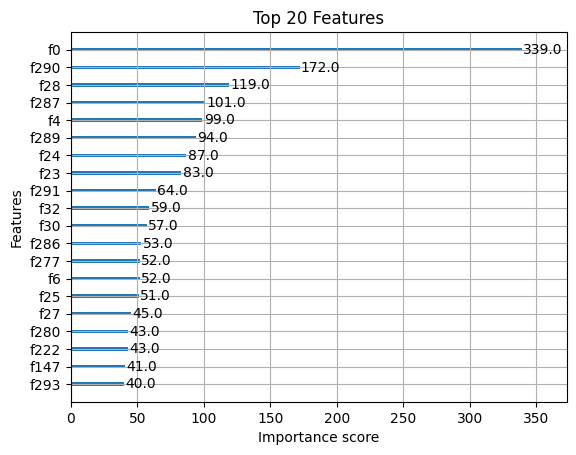

In [44]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# model is called xgb_model
plot_importance(xgb_model, max_num_features=20, importance_type='weight', title='Top 20 Features')
plt.show()

Now let's save the model

In [ ]:
import joblib

joblib.dump(elastic_net, "elasticnet_model.pkl")
print("Model saved as 'elasticnet_model.pkl'")

Let's save the scaler too incase we need to scale new data in the same way

In [ ]:
joblib.dump(scaler, "scaler.pkl")
print("Scaler saved as 'scaler.pkl'")